MARKET BASKET ANALYSIS PROJECT DOCUMENTATION (DOCUMENTED BY MYSELF)

1. Project Goal

The objective of this project is to perform Market Basket Analysis to uncover frequent product combinations purchased together by customers. These insights can help retail businesses optimize product placement and create targeted marketing strategies like cross-selling and promotions.

In [6]:
import pandas as pd

dataframe = pd.read_csv("Groceries_data.csv")

dataframe.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


2. Dataset Description

Dataset: Groceries dataset containing transactions from a supermarket from kaggle.
- Each row represents a single purchased item.
- Unique tansactions are identified by customer ID and date.
- The dataset includes columns:
- Member_number: Customer identifier
- Date: Transaction date
- itemDescription: Purchased product name

3. Assumptions

- Each unique combination of Member_number and Date represents one shopping basket/transaction.
- Duplicate items within the same basket are treated as a single occurrence (only presence/absence matters).
- No missing or incorrect transaction data assumed.
- Minimum support is set considering data sparsity (adjusted to 0.01).

In [7]:
dataframe['single_transaction'] = dataframe['Member_number'].astype(str) + "_" + dataframe['Date'].astype(str)

basket = dataframe.groupby(['single_transaction'])['itemDescription'].apply(list)

basket.info()

<class 'pandas.core.series.Series'>
Index: 14963 entries, 1000_2014-06-24 to 5000_2015-10-02
Series name: itemDescription
Non-Null Count  Dtype 
--------------  ----- 
14963 non-null  object
dtypes: object(1)
memory usage: 233.8+ KB


4. Data Preparation

- Group transactions by customer and date to form baskets.
- Convert lists of items per basket into a one-hot encoded DataFrame using TransactionEncoder from mlxtend.
- This format is required to apply the Apriori algorithm.

In [8]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

basket_df.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


5. Methodology

- Use the Apriori algorithm to identify frequent itemsets with support ≥ 1%.
- Generate association rules based on lift ≥ 1 to find meaningful correlations.
- Analyze key metrics:
- Support: Frequency of itemset occurrence.
- Confidence: Likelihood of consequent given antecedent.
- Lift: How much more frequently items appear together versus random chance.

In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket_df, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

        antecedents       consequents   support  confidence      lift
0  (tropical fruit)        (UHT-milk)  0.001537    0.022682  1.060617
1        (UHT-milk)  (tropical fruit)  0.001537    0.071875  1.060617
2     (brown bread)            (beef)  0.001537    0.040853  1.203301
3            (beef)     (brown bread)  0.001537    0.045276  1.203301
4    (citrus fruit)            (beef)  0.001804    0.033962  1.000349


6. Results

- Extracted frequent itemsets showing commonly co-purchased products.
- Generated a set of association rules highlighting significant relationships.
- Visualized top rules by lift using horizontal bar charts.

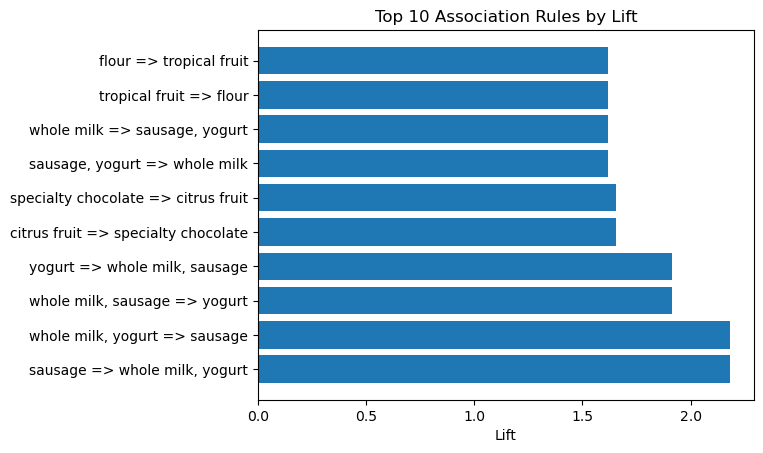

In [10]:
import matplotlib.pyplot as plt

top_rules = rules.sort_values('lift', ascending=False).head(10)

plt.barh(range(len(top_rules)), top_rules['lift'], align='center')
plt.yticks(range(len(top_rules)), [f"{', '.join(list(a))} => {', '.join(list(c))}"
                                   for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])

plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.show()


7. Business Insights & Recommendations

- Products such as {Milk, Bread} are often bought together, suggesting grouping them on shelves or bundled promotions.
- Some product pairs (e.g., {Yogurt} and {Milk}) show strong association, indicating cross-selling opportunities.
- Insights can help reduce time customers spend searching by organizing store layout according to popular product combinations.
- Marketing campaigns targeted at high-confidence rules may increase sales and customer satisfaction.